## Search for the best Parameters

using dataset:
    
    ex6data1.mat - Example Dataset 1
    
    ex6data2.mat - Example Dataset 2
    
    ex6data3.mat - Example Dataset 3
    
    spamTrain.mat - Spam training set
    
    spamTest.mat - Spam test set
    
    emailSample1.txt - Sample email 1
    
    emailSample2.txt - Sample email 2
    
    spamSample1.txt - Sample spam 1
    
    spamSample2.txt - Sample spam 2
    
    vocab.txt - Vocabulary list

In this part,ex6data.mat.

You are given the variables:
        
    X,y
    
    Xval,yval
    
Your task is to use the cross validation set $Xval$ $yval$ to determine the best $C$ and $\sigma$ parameter

Kernel:$Gaussian Kernels$

### 1.1 Example Dataset 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

%matplotlib inline
%config InlineBackend.figure_format='svg'

In [2]:
dataSet=loadmat('ex6data3.mat')

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

def plotData(dataSet):
    
    data_train=pd.DataFrame(dataSet.get('X'),columns=['X1','X2'])
    data_train['y']=dataSet.get('y')
    data_val=pd.DataFrame(dataSet.get('Xval'),columns=['Xval1','Xval2'])
    data_val['yval']=dataSet.get('yval')

    
    plt.figure(figsize=(12,8))
    plt.tick_params(direction='in')
    
    positive=data_train[data_train['y'].isin([1])]
    negative=data_train[data_train['y'].isin([0])]
    
    
    plt.scatter(positive['X1'],positive['X2'],c='black',edgecolors='black',marker='+')
    plt.scatter(negative['X1'],negative['X2'],c='yellow',edgecolors='black',marker='o')    

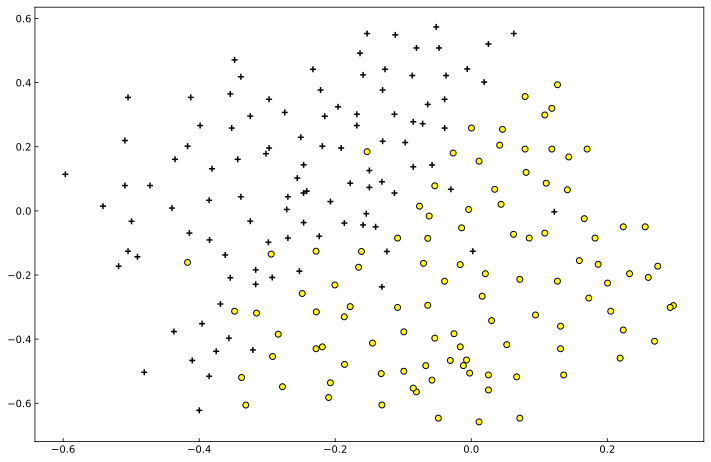

In [4]:
plotData(dataSet)

In [5]:
def load_mat():
    dataSet=loadmat('ex6data3.mat')
    
    data_train=pd.DataFrame(dataSet.get('X'),columns=['X1','X2'])
    data_train['y']=dataSet.get('y')
    data_val=pd.DataFrame(dataSet.get('Xval'),columns=['Xval1','Xval2'])
    data_val['yval']=dataSet.get('yval')
    
    return data_train,data_val

### 1.2 Manual grid search for $C$ and $\sigma$

In [6]:
from sklearn.svm import SVC

candidate = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
combination=[(C,gamma) for C in candidate for gamma in candidate]
print("combination:\n{}".format(combination))

data_train,data_val=load_mat()

search=[]
for C,gamma in combination:
    svc=SVC(C=C,kernel='rbf',gamma=gamma)
    svc.fit(data_train[['X1','X2']],data_train['y'])
    search.append(svc.score(data_val[['Xval1','Xval2']],data_val['yval']))

combination:
[(0.01, 0.01), (0.01, 0.03), (0.01, 0.1), (0.01, 0.3), (0.01, 1), (0.01, 3), (0.01, 10), (0.01, 30), (0.01, 100), (0.03, 0.01), (0.03, 0.03), (0.03, 0.1), (0.03, 0.3), (0.03, 1), (0.03, 3), (0.03, 10), (0.03, 30), (0.03, 100), (0.1, 0.01), (0.1, 0.03), (0.1, 0.1), (0.1, 0.3), (0.1, 1), (0.1, 3), (0.1, 10), (0.1, 30), (0.1, 100), (0.3, 0.01), (0.3, 0.03), (0.3, 0.1), (0.3, 0.3), (0.3, 1), (0.3, 3), (0.3, 10), (0.3, 30), (0.3, 100), (1, 0.01), (1, 0.03), (1, 0.1), (1, 0.3), (1, 1), (1, 3), (1, 10), (1, 30), (1, 100), (3, 0.01), (3, 0.03), (3, 0.1), (3, 0.3), (3, 1), (3, 3), (3, 10), (3, 30), (3, 100), (10, 0.01), (10, 0.03), (10, 0.1), (10, 0.3), (10, 1), (10, 3), (10, 10), (10, 30), (10, 100), (30, 0.01), (30, 0.03), (30, 0.1), (30, 0.3), (30, 1), (30, 3), (30, 10), (30, 30), (30, 100), (100, 0.01), (100, 0.03), (100, 0.1), (100, 0.3), (100, 1), (100, 3), (100, 10), (100, 30), (100, 100)]


In [7]:
#Search for best param
best_score=search[np.argmax(search)]
best_param=combination[np.argmax(search)]

print("best score:\n{}\nbest param:\n{}".format(best_score,best_param))

best score:
0.965
best param:
(0.3, 100)


In [8]:
best_svc=SVC(C=best_param[1],gamma=best_param[0],kernel='rbf')
best_svc.fit(data_train[['X1','X2']],data_train['y'])
ypred=best_svc.predict(data_val[['Xval1','Xval2']])

#Sklearn accuary
from sklearn.metrics import classification_report
print(classification_report(data_val['yval'],ypred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       113
           1       0.94      0.89      0.91        87

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



In [9]:
#Mannul accuary

accuary=sum([1 if (x==y) else 0 for (x,y) in zip(data_val['yval'],ypred)])

print("accuary:{}".format(accuary/len(ypred)))

accuary:0.925


In [10]:
def plot_decision_boundary(svc,X):
    x_min,x_max=X[:,0].min()*1.2,X[:,0].max()*1.2
    y_min,y_max=X[:,1].min()*1.1,X[:,1].max()*1.1
    
    xx,yy=np.meshgrid(np.linspace(x_min,x_max,500),
                      np.linspace(y_min,y_max,500))
    
    Z=svc.predict(np.c_[xx.ravel(),yy.ravel()])
    
    Z=Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z,colors='blue')

In [11]:
def plotData(dataSet,svc):
    
    data_train=pd.DataFrame(dataSet.get('X'),columns=['X1','X2'])
    data_train['y']=dataSet.get('y')
#     data_val=pd.DataFrame(dataSet.get('Xval'),columns=['Xval1','Xval2'])
#     data_val['yval']=dataSet.get('yval')

    
    plt.figure(figsize=(12,8))
    plt.tick_params(direction='in')
    
    positive=data_train[data_train['y'].isin([1])]
    negative=data_train[data_train['y'].isin([0])]
    
    
    plt.scatter(positive['X1'],positive['X2'],c='black',edgecolors='black',marker='+')
    plt.scatter(negative['X1'],negative['X2'],c='yellow',edgecolors='black',marker='o')
    plot_decision_boundary(svc,dataSet.get('X'))

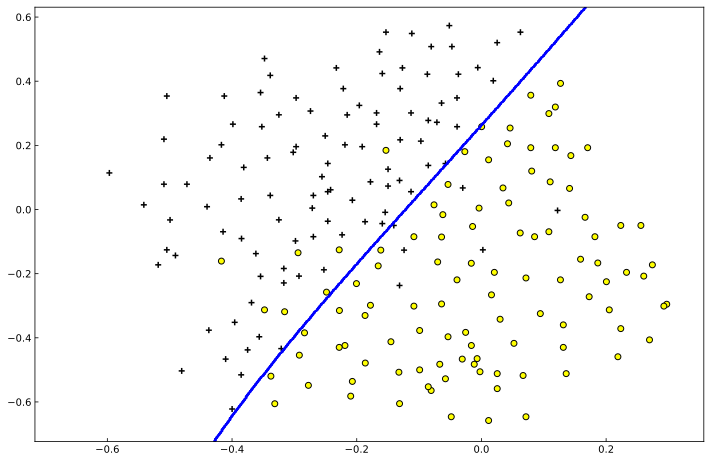

In [12]:
plotData(dataSet,best_svc)

### 1.3 Sklearn GridSearchCV

In [13]:
from sklearn.model_selection import GridSearchCV
paramters={'C':candidate,'gamma':candidate}

svc=SVC(kernel='rbf')
clf=GridSearchCV(svc,paramters,n_jobs=-1)
clf.fit(data_train[['X1','X2']],data_train['y'])

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100],
                         'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [14]:
clf.best_params_

{'C': 30, 'gamma': 3}

In [15]:
clf.best_score_

0.9194905869324475

In [16]:
ypred=clf.predict(data_val[['Xval1','Xval2']])
print(classification_report(ypred,data_val['yval']))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       115
           1       0.93      0.95      0.94        85

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [17]:
accuary=sum([1 if (x==y) else 0 for (x,y) in zip(ypred,data_val['yval'])])
print("accuary:{}".format(accuary/len(ypred)))

accuary:0.95


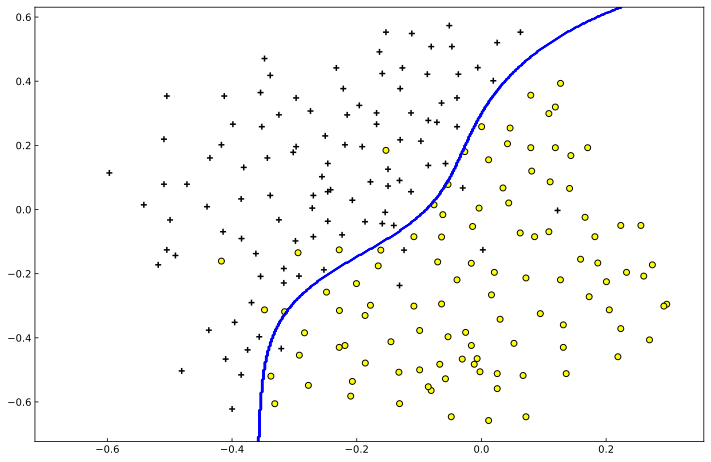

In [18]:
best_svc=SVC(C=clf.best_params_['C'],gamma=clf.best_params_['gamma'])
best_svc.fit(data_train[['X1','X2']],data_train['y'])
plotData(dataSet,best_svc)

curiouly... they are not the same result. What?  

So the built in sklearn grid search is trying to find the best candidate from **training set**  
However, when we were doing manual grid search, we train using training set, but we pick the best from **cross validation set**. This is the reason of difference.

### The reason is:
It turns out that **GridSearch** will appropriate part of data as CV and use it to find the best candidate.  
So the reason for different result is just that GridSearch here is just using part of **training data** to train because it need part of data as cv set